In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from keras.models import load_model, Model
from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
from keras.optimizers import Adam
from misc.utils import generate_generator, gen_imgPaths_and_labelPaths, monitor_mae, monitor_mse, \
                       sample_predictions, first_predictions, calc_mae_mse, get_profile
from sklearn.model_selection import train_test_split
from models import MCNN

%matplotlib inline
np.random.seed(31415)

Using TensorFlow backend.


In [2]:
train_img, train_labels, test_img, test_labels \
= (
    np.load('./npy/train_img.npy'),
    np.load('./npy/train_labels.npy'),
    np.load('./npy/test_img.npy'),
    np.load('./npy/test_labels.npy')
)

test_img, validation_img, test_labels, validation_labels = train_test_split(test_img, test_labels, test_size=0.5, random_state=42)

In [3]:
count = []
for v in test_labels:
    count.append(np.sum(np.squeeze(v)))
print(round(np.mean(count), 2))
print(round(np.std(count), 2))

122.84
103.36


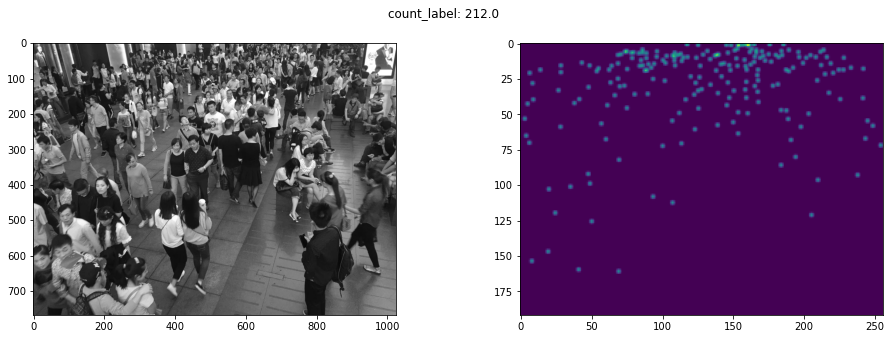

In [4]:
for i in [3]:
    inputs = np.reshape(test_img[i], [1, *test_img[i].shape[:2], 1])
    density_map = np.squeeze(test_labels[i])
    count_label = np.sum(density_map)

    fg, (ax0, ax1) = plt.subplots(1, 2, figsize=(16, 5))
    plt.suptitle(' '.join([
        'count_label:', str(round(count_label, 3))
    ]))
    ax0.imshow(np.squeeze(inputs), cmap='gray')
    ax1.imshow(density_map * (255 / (np.max(density_map) - np.min(density_map))))
    plt.show()

In [5]:
# Reading preprocessed data into memory

train_img, train_labels, test_img, test_labels \
= (
    np.load('./npy/masks_train_img.npy'),
    np.load('./npy/masks_train_labels.npy'),
    np.load('./npy/masks_test_img.npy'),
    np.load('./npy/masks_test_labels.npy')
)

test_img, validation_img, test_labels, validation_labels = train_test_split(test_img, test_labels, test_size=0.5, random_state=42)

In [6]:
count = []
for v in test_labels:
    count.append(np.sum(np.squeeze(v)))
print(round(np.mean(count), 2))
print(round(np.std(count), 2))

37.26
15.67


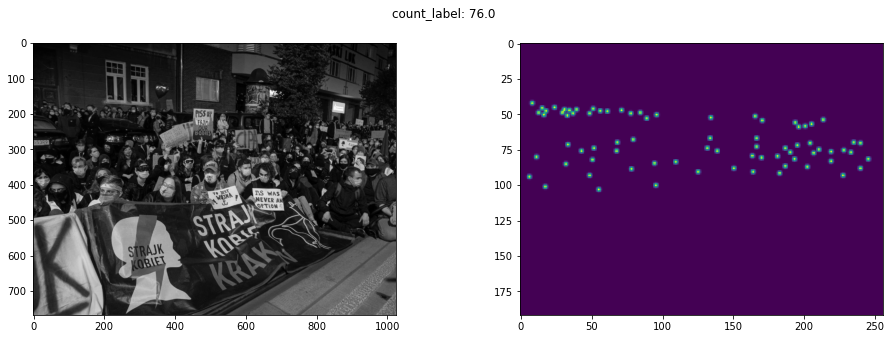

In [7]:
for i in [1]:
    inputs = np.reshape(test_img[i], [1, *test_img[i].shape[:2], 1])
    density_map = np.squeeze(test_labels[i])
    count_label = np.sum(density_map)

    fg, (ax0, ax1) = plt.subplots(1, 2, figsize=(16, 5))
    plt.suptitle(' '.join([
        'count_label:', str(round(count_label, 3))
    ]))
    ax0.imshow(np.squeeze(inputs), cmap='gray')
    ax1.imshow(density_map * (255 / (np.max(density_map) - np.min(density_map))))
    plt.show()